In [1]:
import pandas as pd
import seaborn as sn
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\INDIA\\Downloads\\Assignment csv file\\ToyotaCorolla.csv",encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
data[data.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


In [5]:
data1 = data.drop(['Id', 'Model', 'Mfg_Month', 'Mfg_Year', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Cylinders', 'Mfr_Guarantee',
          'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer',
           'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider',
           'Metallic_Rim', 'Radio_cassette', 'Tow_Bar'] , axis = 1)
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
data2 = data1.rename({'Age_08_04' : 'Age', 'cc': 'CC', 'Quarterly_Tax' : 'QT'}, axis = 1 )
data2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


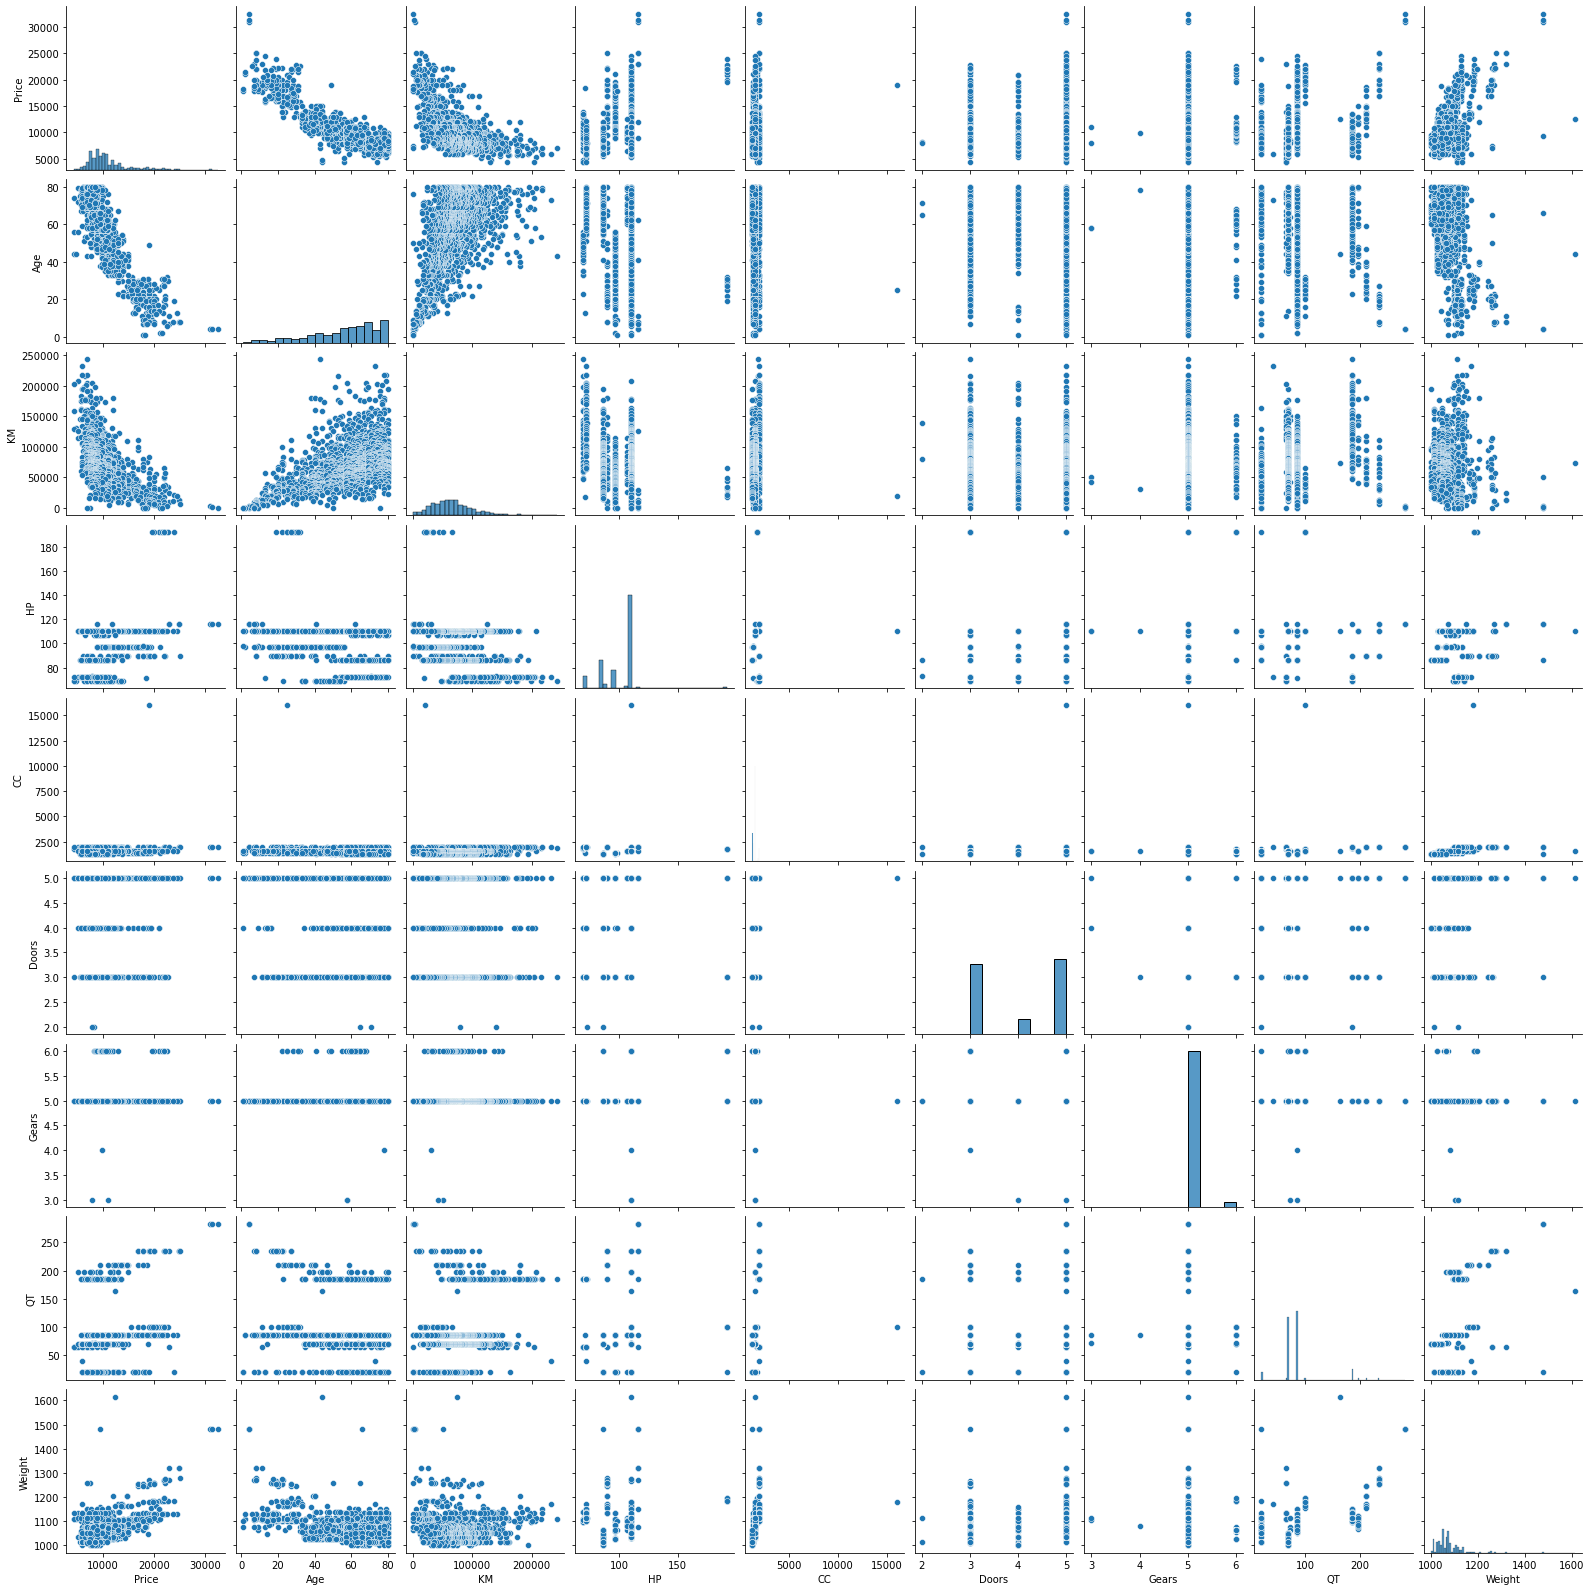

In [7]:
sn.pairplot(data2)

In [8]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=data2).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:18:43   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# we are getting insignificant p-values for "CC" and "Doors" 
# we will check with simple-linear regression for both the inputs

In [11]:
slr_cc = smf.ols('Price~CC',data=data2).fit()
slr_doors = smf.ols('Price~Doors', data=data2).fit()

In [12]:
slr_cc.pvalues , slr_doors.pvalues

(Intercept    1.766912e-112
 CC            1.550808e-06
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [13]:
# as the pvalues for doors and CC are significant for simple linear regression.


# now we will check with the multi-Linear Regression
mlr_cd = smf.ols('Price~CC+Doors', data=data2).fit()

In [14]:
mlr_cd.pvalues

Intercept    1.056885e-34
CC           1.521992e-05
Doors        1.373469e-11
dtype: float64

In [15]:
# the pvalues for doors and CC are also significant for multi linear regression.

# Check the colinearity

In [16]:
rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight', data=data2).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight', data=data2).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+Age+CC+Doors+Gears+QT+Weight', data=data2).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC~KM+HP+Age+Doors+Gears+QT+Weight', data=data2).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~KM+HP+CC+Age+Gears+QT+Weight', data=data2).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~KM+HP+CC+Doors+Age+QT+Weight', data=data2).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_qt = smf.ols('QT~KM+HP+CC+Doors+Gears+Age+Weight', data=data2).fit().rsquared
vif_qt = 1/(1-rsq_qt)

rsq_weight = smf.ols('Weight~KM+HP+CC+Doors+Gears+QT+Age', data=data2).fit().rsquared
vif_weight = 1/(1-rsq_weight)

In [17]:
df = { 'Inputs' : ['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
     'VIF' : [ vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_qt, vif_weight]}

vif_frame = pd.DataFrame(df)
vif_frame

,Inputs,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


In [18]:
# as all the vif values for input are less than 20  we can say that there is no colinearity 

# Partial regression plot

In [19]:
import statsmodels.api as sm

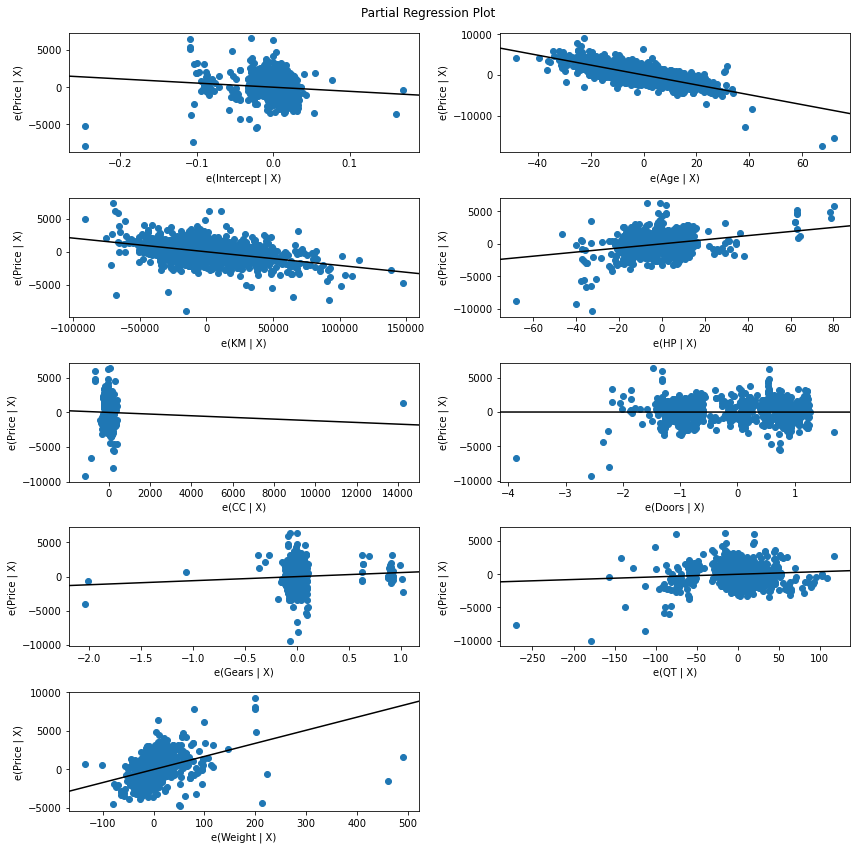

In [20]:
fig = plt.figure(figsize=(12, 12))
fig = sm.graphics.plot_partregress_grid(model,fig=fig)
plt.show()


In [21]:
# from above figure we can say that all the inputs veriable contributings towards ouput

# cooks distance : to find the outlier

In [22]:
from statsmodels.graphics.regressionplots import influence_plot

In [23]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

<StemContainer object of 3 artists>

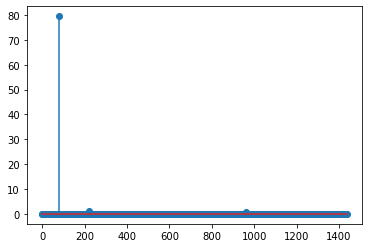

In [24]:
plt.stem(np.arange(len(data2)),np.round(c,3))

In [25]:
(np.argmax(c),np.max(c))

(80, 79.5201062414182)

In [26]:
# 80th row is highly influenceal so we will remove that row

In [27]:
data3 = data2.drop(data2.index[80],axis=0).reset_index()
data3 = data3.drop(['index'],axis=1)
data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [28]:
model2 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=data3).fit()

In [29]:
# we will again check the outliers = highly obersed row
    
model_influence1 = model2.get_influence()
(c1,_) = model_influence1.cooks_distance

<StemContainer object of 3 artists>

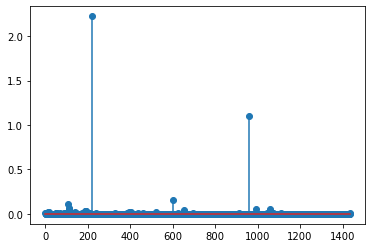

In [30]:
plt.stem(np.arange(len(data3)),np.round(c1,3))

In [31]:
(np.argmax(c1)),np.max(c1)

(220, 2.224461171300723)

In [32]:
# 220th row is now outlier means highliy observed value 
# we will remove that

In [33]:
data4 = data3.drop(data3.index[220],axis=0).reset_index()
data4 = data4.drop(['index'],axis=1)
data4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [34]:
model3 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=data4).fit()


In [35]:
# we will again check the outliers = highly obersed row
   
    
model_influence2 = model3.get_influence()
(c2,_) = model_influence2.cooks_distance


<StemContainer object of 3 artists>

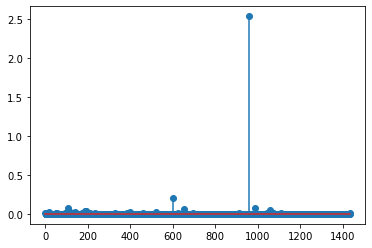

In [36]:
plt.stem(np.arange(len(data4)),np.round(c2,3))

In [37]:
(np.argmax(c2)),np.max(c2)

(958, 2.5312566930232503)

In [38]:
# now we will again drop 958th row

data5 = data4.drop(data4.index[958],axis=0).reset_index()
data5 = data5.drop(['index'],axis=1)
data5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [39]:
model4 = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=data5).fit()

In [40]:
# we will again check the outliers = highly obersed row
   
    
model_influence3 = model4.get_influence()
(c3,_) = model_influence3.cooks_distance

<StemContainer object of 3 artists>

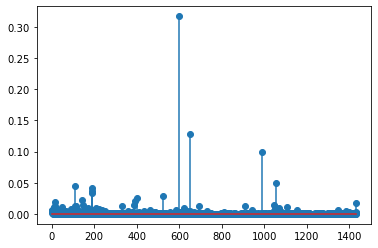

In [41]:
plt.stem(np.arange(len(data5)), np.round(c3,3))

In [42]:
# as there are no any oberserd value more than 1 
# we will stop here

# errors assumption :

In [43]:
predict_price = model4.predict(data5)

In [44]:
predict_price

0       16333.273814
1       15892.326850
2       16310.886081
3       15979.990390
4       15846.536733
            ...     
1428     9115.435074
1429     8499.218117
1430     8644.947302
1431     8758.664462
1432    10641.521002
Length: 1433, dtype: float64

In [45]:
errors = data5.Price - predict_price

In [46]:
errors.mean()

-2.7944094602821887e-09

In [47]:
# mean of our error is equal to zero

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

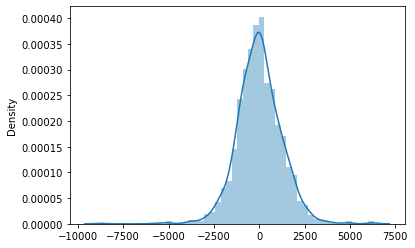

In [48]:
sn.distplot(errors)

In [49]:
# its normally distributed 

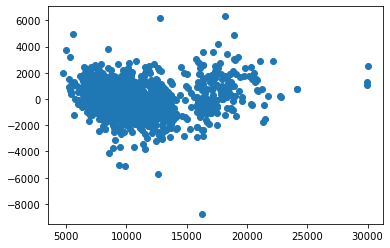

In [50]:
# check homoscadasticity

plt.scatter(predict_price, errors)

In [51]:
# yes they do not follow any relation

# model validation :-

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train_data, test_data = train_test_split(data5, test_size=0.3 )
print("train data:-", train_data.shape  ,"AND",  "test_data:-", test_data.shape)

train data:- (1003, 9) AND test_data:- (430, 9)


In [54]:
def RMSE (pred,actual):
    return np.sqrt(np.mean((actual-pred)*(actual-pred)))

In [55]:
# for training data :- 

train_model = smf.ols('Price~Age+HP+KM+CC+Weight+Doors+Gears+QT', data=train_data).fit()

In [56]:
actual_train_price = train_data.Price
pred_train_price = train_model.predict(train_data)

rmse_train = RMSE(pred_train_price , actual_train_price)
rmse_train

1195.8397293671217

In [57]:
# for testing data :-

test_model = smf.ols('Price~Age+HP+KM+CC+Weight+Doors+Gears+QT', data=test_data).fit()

In [58]:
actual_test_price = test_data.Price
pred_test_price = test_model.predict(test_data)

rmse_test = RMSE (pred_test_price , actual_test_price)
rmse_test

1292.0876564604778

In [59]:
# as the rmse value for testing data is less than training data we can say that our model is valid model.

----------------------------------------------------------END-------------------------------------------------------------------------------------